<a href="https://colab.research.google.com/github/ebenajayi/C-Core_Design_Assistant/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Some sections of the code have been compiled from various sources in the internet and in relevent papers, which have been referenced in our final report.


Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import time
import re 

'''Features'''
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2, SelectKBest

'''Classifiers'''
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from scipy import interp
from itertools import cycle

'''Plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

'''Display'''
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

'''Classifiers'''
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

'''Lemmatizer'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

'''Stemmer'''
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem import PorterStemmer

'''Progress  Bar'''
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

'''Stopwords Corpus'''
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords, wordnet
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Loading Data

In [ ]:

print("Reading of the data files on process...")

df = pd.read_csv("/content/train.csv")
test= pd.read_csv("/content/test.csv")
print("Task Completed")
  
df.head()

Reading of the data files on process...
Task Completed


,body,subreddit
0,As the title says I'm looking for recommendat...,rpg
1,Poor planning. Yeah I can tie together a neat...,rpg
2,I'm actually running (two of) my dream campaig...,rpg
3,In general note that all level-class systems a...,rpg
4,Just posted this review at my blog of the newl...,rpg



Checking for duplicate posts

In [ ]:
# To check for duplicated data
df[df["body"].duplicated()]

,body,subreddit
610,I’m trying to figure out the best remote recor...,rpg
2014,Hello! If you ever find yourself needing anime...,anime
2018,Hello! If you ever find yourself needing anime...,anime
2019,Hello! If you ever find yourself needing anime...,anime
2020,Hello! If you ever find yourself needing anime...,anime
...,...,...
11081,This post appears to be a direct link to a vid...,gamedev
11100,This post appears to be a direct link to a vid...,gamedev
11105,This post appears to be a direct link to a vid...,gamedev
11112,This post appears to be a direct link to a vid...,gamedev


Dropping Duplicate Post (not much useful)

Trials after dropping duplicate posts didn't lead to improved accuracy

In [ ]:
# #To drop the duplicated data
df=df.drop_duplicates(keep='first',subset='body')
df.shape

X_datatrain = df['body']
y_datatrain = df['subreddit']
X_datatest = test['body']

Preprocessing Data

In [ ]:

#Progress bar
def process_data(data):
    data = data.progress_map(preprocess_data)  
    return data

#Preprocessing the data
def preprocess_data(review):
    document = cleaning_data(review)
    document = stopwords_data(document)
    document = lemmatize_data(document)
    document = stem_data(document)
    
    return document

HTML removal, contraction removal, Lemmatizing and Stemming also didn't lead to improved accuracy - Thus dropped

In [ ]:
# Function to remove noise from text and deal with negation
def cleaning_data(comment):
    
    #Remove Non-ASCII characters
    comment = re.sub(r"\xa0",r" ",comment)
    comment = comment.encode("ascii", errors="ignore").decode()
    
    #Lower case the data
    comment = comment.lower()
    
    #Remove HTML Links
    comment = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', comment)   
    comment = re.sub(r'\n','',comment)
    
    #Cleaning the data by removing special characters
    comment = re.sub(r"[^A-Za-z0-9!?\'\`]", " ", comment)
    
    #Handling negations
    comment = re.sub(r"youtu.be", " youtube", comment)
    comment = re.sub(r"https", " http", comment)
    comment = re.sub(r"i'm", " i am", comment)
    comment = re.sub(r"it's", " it is", comment)
    comment = re.sub(r"ain't", "is not",comment)
    comment = re.sub(r"aren't", "are not",comment)
    comment = re.sub(r"couldn't", "could not",comment)
    comment = re.sub(r"didnt", "did not",comment)
    comment = re.sub(r"dont", "do not",comment)
    comment = re.sub(r"doesn't", "does not",comment)
    comment = re.sub(r"hadn't", "had not",comment)
    comment = re.sub(r"hasn't", "has not",comment)
    comment = re.sub(r"haven't", "have not",comment)
    comment = re.sub(r"isn't", "is not",comment)
    comment = re.sub(r"shouldn't", "should not",comment)
    comment = re.sub(r"shan't", "shall not",comment)
    comment = re.sub(r"wasn't", "was not",comment)
    comment = re.sub(r"weren't", "were not",comment)
    comment = re.sub(r"oughtn't", "ought not",comment)
    comment = re.sub(r"that's", " that is", comment)
    comment = re.sub(r"\'s", " ", comment)
    comment = re.sub(r"\'ve", " have", comment)
    comment = re.sub(r"won't", " will not", comment)
    comment = re.sub(r"wouldn't", " would not", comment)
    comment = re.sub(r"don't", " do not", comment)
    comment = re.sub(r"can't", " can not", comment)
    comment = re.sub(r"cannot", " can not", comment)
    comment = re.sub(r"n\'t", " n\'t", comment)
    comment = re.sub(r"\'re", " are", comment)
    comment = re.sub(r"\'d", " would", comment)
    comment = re.sub(r"\'ll", " will", comment)    
    comment = re.sub(r"!", " ! ", comment)
    comment = re.sub(r"\?", " ? ", comment)
    comment = re.sub(r"\s{2,}", " ", comment)
    
    # Removing all the numbers
    comment = re.sub(r'[0-9]+', ' ', comment)
    
    #Removing all punctuations
    comment = re.sub(r'[^\w\s]','',comment)
    
    # Substituting multiple spaces with single space
    comment = re.sub(r'\s+', ' ', comment, flags=re.I)
    
    # Remove single letters
    comment= re.sub(r"\b[a-zA-Z]\b","", comment)
        
    comment = [word for word in comment.split() if len(word) >= 2]
    comment = ' '.join(comment)
    
    return comment
  
#Removing the stop words
def stopwords_data(comment):
    more_stop_words = ["wa", "gt","amp", "u", "ha", "le", "doe", "don",'ve']
    stop_words_ = stop_words.union(more_stop_words)
    comment = [word for word in comment.split() if not word in stop_words_]
    comment = ' '.join(comment)           
    return comment

#Tag words by their parts of speech 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#Normalising the data by lemmatizing
def lemmatize_data(comment):
    comment = [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in comment.split()]
    comment = ' '.join(comment)
    comment = [word for word in comment.split() if len(word) >= 3]
    comment = ' '.join(comment)
    return comment

#Normalise data by user-defined stemming
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

def stemmer(phrase):
    r=[]
    for word in phrase.split():
        r.append(stem(word))
    return ' '.join(r)
  
#Normalising the data by renowned stemming methods

stemmer=SnowballStemmer('english')
def stem_data(comment):
    comment = [stemmer.stem(word) for word in comment.split()]
    comment = ' '.join(comment)
    comment = [word for word in comment.split() if len(word) >= 3]
    comment = ' '.join(comment)
    return comment

#list of cleaned words
def cleandata(X_datatrain, X_datatest):
    cleandata_Train = []
    for sen in range(0, len(X_datatrain)): 
        cleandata_Train.append(preprocess_data(str(X_datatrain[sen])))
        
    cleandata_Test = []
    for sen in range(0, len(X_datatest)): 
        cleandata_Test.append(preprocess_data(str(X_datatest[sen])))
    return cleandata_Train, cleandata_Test

In [ ]:
print("Cleaning of Training data on process...")
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
cleandata_Train = process_data(X_datatrain)
print("Task completed")
print("Cleaning of Testing data on process...")
cleandata_Test = process_data(X_datatest)
print("Task completed")

Cleaning of Training data on process...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


progress-bar:   0%|          | 9/2898 [00:00<00:32, 88.67it/s]

Task completed
Cleaning of Testing data on process...


progress-bar: 100%|██████████| 2898/2898 [00:25<00:00, 113.86it/s]

Task completed


LDA Implementation

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
!python -m pip install -U pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Requirement already up-to-date: pyLDAvis in /usr/local/lib/python3.6/dist-packages (2.1.2)


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(cleandata_Train))

print(data_words[:1])

[['titl', 'say', 'look', 'recommend', 'random', 'tabl', 'dip', 'case', 'thing', 'slow', 'tabl', 'run', 'mage', 'ascens', 'help', 'fair', 'low', 'key', 'mage', 'splat', 'kind', 'game']]


In [ ]:

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['titl', 'say', 'look', 'recommend', 'random', 'tabl', 'dip', 'case', 'thing', 'slow', 'tabl', 'run', 'mage_ascens', 'help', 'fair', 'low', 'key', 'mage', 'splat', 'kind', 'game']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#python3 -m spacy download en
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['titl', 'say', 'look', 'recommend', 'random', 'tabl', 'dip', 'case', 'thing', 'slow', 'tabl', 'run', 'help', 'fair', 'low', 'key', 'mage', 'kind', 'game']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('case', 1),
  ('dip', 1),
  ('fair', 1),
  ('game', 1),
  ('help', 1),
  ('key', 1),
  ('kind', 1),
  ('look', 1),
  ('low', 1),
  ('mage', 1),
  ('random', 1),
  ('recommend', 1),
  ('run', 1),
  ('say', 1),
  ('slow', 1),
  ('tabl', 2),
  ('thing', 1),
  ('titl', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.080*"case" + 0.049*"engin" + 0.045*"simpl" + 0.042*"appl" + 0.040*"gpu" + '
  '0.040*"core" + 0.038*"link" + 0.028*"major" + 0.027*"server" + '
  '0.026*"gameplay"'),
 (1,
  '0.081*"high" + 0.051*"perform" + 0.051*"product" + 0.048*"low" + '
  '0.044*"real" + 0.036*"plug" + 0.034*"decent" + 0.032*"world" + 0.027*"unit" '
  '+ 0.025*"exist"'),
 (2,
  '0.072*"monitor" + 0.055*"move" + 0.044*"test" + 0.036*"name" + '
  '0.035*"control" + 0.034*"hope" + 0.032*"most" + 0.030*"hit" + '
  '0.026*"import" + 0.023*"slot"'),
 (3,
  '0.080*"level" + 0.072*"card" + 0.045*"exampl" + 0.039*"number" + '
  '0.036*"effect" + 0.034*"allow" + 0.033*"asset" + 0.030*"attack" + '
  '0.026*"amount" + 0.018*"rate"'),
 (4,
  '0.084*"job" + 0.042*"object" + 0.042*"unreal" + 0.040*"issu" + '
  '0.034*"guess" + 0.029*"industri" + 0.028*"crash" + 0.026*"practic" + '
  '0.025*"fact" + 0.023*"epic"'),
 (5,
  '0.099*"car" + 0.037*"instal" + 0.035*"show" + 0.028*"stop" + 0.028*"code" + '
  '0.025*"hour" + 0.

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.916150950154267

Coherence Score:  0.32537236343767223


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=          x     y  topics  cluster  Freq
topic                                   
19    -0.36  0.02       1        1 30.55
17    -0.29  0.03       2        1 10.85
13    -0.17  0.10       3        1  7.32
10    -0.01 -0.42       4        1  5.57
8      0.01 -0.08       5        1  4.65
5      0.02 -0.02       6        1  4.44
7      0.02 -0.01       7        1  4.13
18    -0.01 -0.05       8        1  3.94
1      0.05  0.02       9        1  3.19
9      0.05  0.04      10        1  3.13
2      0.07  0.04      11        1  2.51
6      0.06  0.03      12        1  2.51
15     0.07  0.04      13        1  2.49
3      0.06  0.04      14        1  2.47
14     0.06  0.03      15        1  2.21
11     0.07  0.04      16        1  2.21
4      0.08  0.04      17        1  2.14
0      0.07  0.04      18        1  2.09
12     0.08  0.04      19        1  2.06
16     0.08  0.04      20        1  1.55, topic_info=             Term     Freq    Total Category  logprob  loglift
38            use 4,399.00 4,399.00  Default    30.00    30.00
3            game 8,702.00 8,702.00  Default    29.00    29.00
191          work 4,451.00 4,451.00  Default    28.00    28.00
192         would 5,687.00 5,687.00  Default    27.00    27.00
244          time 2,948.00 2,948.00  Default    26.00    26.00
...           ...      ...      ...      ...      ...      ...
5720       cooler    51.93    52.92  Topic20    -4.73     4.15
1046         bind    49.25    50.24  Topic20    -4.78     4.15
5741        retro    46.32    47.38  Topic20    -4.84     4.15
1889      confirm    39.73    40.73  Topic20    -4.99     4.14
8976  displayport    39.25    40.24  Topic20    -5.01     4.14

[656 rows x 6 columns], token_table=      Topic  Freq     Term
term                      
2545      7  1.00  absolut
882      19  0.99   accept
1620     13  0.99   access
620      19  0.99   accord
1281     16  0.99  account
...     ...   ...      ...
370       2  1.00    worth
192       1  1.00    would
899       3  1.00    write
371       7  1.00    wrong
248       7  1.00     year

[651 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 18, 14, 11, 9, 6, 8, 19, 2, 10, 3, 7, 16, 4, 15, 12, 5, 1, 13, 17])

Visualise our data

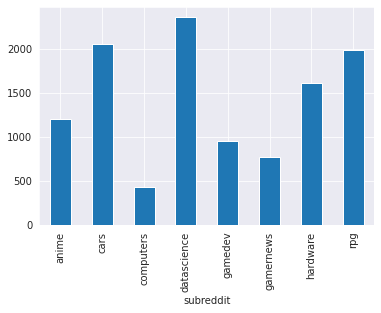

In [ ]:

df.groupby("subreddit").body.count().plot.bar(ylim = 0)
plt.show()

Wordcloud of the most frequent words

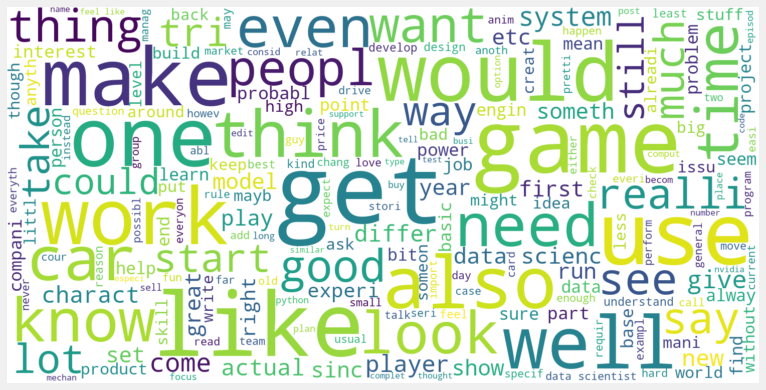

In [ ]:
#Word Cloud 
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud, STOPWORDS
string = []
for t in cleandata_Train:
    string.append(t)
string = pd.Series(string).str.cat(sep=' ')
wordcloud = WordCloud(width=1500, height=750,max_font_size=190,background_color='white', stopwords=stop_words).generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Find the most corelated unigrams and bigrams of each subreddit

In [ ]:
#Find the most corelated unigrams and bigrams of each subreddit
tfidf = TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=20000,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all'...
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...},
                                 strip_accents=None, sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)

features = tfidf.fit_transform(cleandata_Train)#df.comments)
labels = df.subreddit
subreddit_classes = y_datatrain.unique()
N = 5
for subreddit_class in subreddit_classes:
    features_chi2 = chi2(features, labels == subreddit_class)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(subreddit_class))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'rpg':
  . Most correlated unigrams:
. play
. rpg
. rule
. campaign
. player
  . Most correlated bigrams:
. 
# 'anime':
  . Most correlated unigrams:
. girl
. season
. watch
. episod
. anim
  . Most correlated bigrams:
. 
# 'datascience':
  . Most correlated unigrams:
. job
. scientist
. python
. scienc
. data
  . Most correlated bigrams:
. 
# 'hardware':
  . Most correlated unigrams:
. intel
. gpu
. amd
. card
. nvidia
  . Most correlated bigrams:
. 
# 'cars':
  . Most correlated unigrams:
. bmw
. brake
. drive
. vehicl
. car
  . Most correlated bigrams:
. 
# 'gamernews':
  . Most correlated unigrams:
. game
. epic
. consol
. tweet
. xbox
  . Most correlated bigrams:
. 
# 'gamedev':
  . Most correlated unigrams:
. tutori
. godot
. unreal
. game
. uniti
  . Most correlated bigrams:
. 
# 'computers':
  . Most correlated unigrams:
. window
. comput
. motherboard
. ram
. laptop
  . Most correlated bigrams:
. 


Confusion Matrix

In [ ]:
def confusion_matrix(ypred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(confusion_matrix(y_test, ypred, labels=np.unique(y_test)), annot=True, fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=ax)
    #display(pd.DataFrame(confusion_matrix(y_test , ypred), columns=['Pred: Reddit','CS:GO','Overwatch','Music','anime','baseball','canada','conspiracy','europe','funny','GOT','hockey','movies','LOL','nba','soccer','nfl','trees','news','wow'], index=['AskReddit','GlobalOffensive','Overwatch','Music','anime','baseball','canada','conspiracy','europe','funny','GOT','hockey','movies','league of legends','nba','soccer','nfl','trees','news','wow']))
    print(classification_report(y_test,ypred))  
    Accuracy = accuracy_score(y_test, ypred)
    return Accuracy

Pipeline to get a preliminary idea of the best features

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 32.9min finished


Best cross-validation score: 0.88
Best score: 0.8761120263591433
Best paramters: {'nb__alpha': 0.07, 'nb__fit_prior': True, 'tvec__max_df': 0.7, 'tvec__max_features': 20000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2), 'univ_select__k': 10000}
Best estimator:  Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=20000,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all'...
                                             'being', '

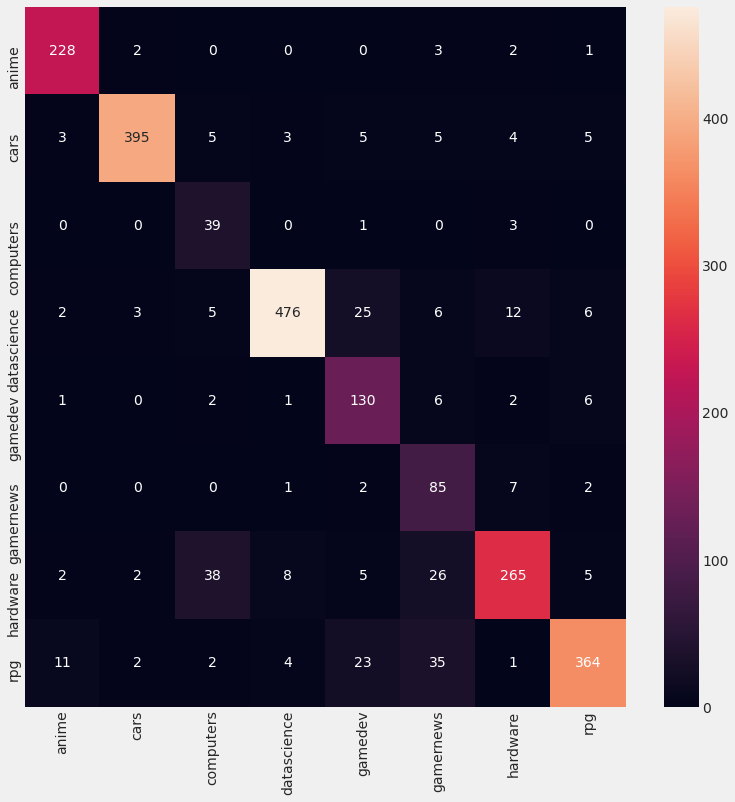

In [ ]:
# Defining a pipeline that prints the score, parameters, recall, precision, conf matrix of the best gridsearch model
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stop_words,sublinear_tf=True,max_df=0.7,ngram_range=(1,1))),
    ("univ_select", SelectKBest(chi2)),
    ('nb', MultinomialNB())
])

grid_params = {
    'tvec__max_df': (0.7,0.9),
    'tvec__min_df': (1,2),
    'tvec__max_features': [20000, 25000,30000, 35000, 40000],
    'tvec__ngram_range': ((1, 1), (1, 2)),
    "univ_select__k": [10000,15000],
    'nb__fit_prior': [True],
    'nb__alpha': [0.07, 0.1, 0.15, 0.2, 0.3],

}

from sklearn.model_selection import train_test_split
X_training, X_testing, y_training, y_testing = train_test_split(cleandata_Train, y_datatrain, test_size=0.2)
    
grid_search = GridSearchCV(pipe, grid_params, cv = 5, verbose = 1, n_jobs = -1)
#print(y_training)
grid_search.fit(X_training, y_training)

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    # Printing the best score/parameters from the grid search
print('Best score: {}'.format(grid_search.best_score_))
print('Best paramters: {}'.format(grid_search.best_params_))

    # Best model from grid search
grid_model = grid_search.best_estimator_
print("Best estimator: ", grid_model)
print('Model score on x_train: {}'.format(grid_model.score(X_training, y_training)))

    # Prediction and score
prediction = grid_model.predict(X_testing)
print('Accuracy score of prediction: {}'.format(accuracy_score(y_testing, prediction)))

    # Confusion Matrix
conf_matrix_grid = confusion_matrix(y_testing, prediction)

Count Vectorization along with TFIDF Transformation

In [ ]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1, 1),min_df=2,max_df=0.7)
X_train_vect = vectorizer.fit_transform(cleandata_Train) 
X_test_vect = vectorizer.transform(cleandata_Test)
X_train_vect.shape

(11382, 11184)

In [ ]:
tfidfconverter = TfidfTransformer(sublinear_tf=True, use_idf =True, norm='l2')  
X_train_tfidf = tfidfconverter.fit_transform(X_train_vect)
X_test_tfidf = tfidfconverter.transform(X_test_vect)
X_tfidf=X_train_tfidf
y_train=y_datatrain

CHI2 test to select K best features

(Novel method implemented: Select best features using a Chi^2 test rather than by frequency)

In [ ]:
chi2_selector = SelectKBest(chi2, 11111)
X_tfidf_sel2 = chi2_selector.fit_transform(X_tfidf, y_train) 
X_test_tfidf_sel2 = chi2_selector.transform(X_test_tfidf)

In [ ]:

# Basic multinomial NB - Only accuracy score
clf = MultinomialNB(alpha = 0.08, fit_prior = False)
pred_acc = cross_val_score(clf, X_tfidf_sel2, y_train, cv = 5)
print(pred_acc.mean())

0.8887713769466654


TFIDF values of the most frequent words

In [ ]:
dfmat = pd.DataFrame(data={"count":X_train_tfidf.sum(axis=0).tolist()[0], "name":vectorizer.get_feature_names()})
dfmat = dfmat.sort_values(by="count", ascending = False)

In [ ]:
dfmat.head(20)

,count,name
5570,297.21,like
3848,284.99,game
5800,241.87,make
10526,237.47,use
2320,209.18,data
11001,207.66,work
10791,195.20,want
9966,191.48,time
5662,186.53,look
9899,186.31,think


# Model selection and Evaluation

List of classifiers

 We have used the following models  in our project.

              1. Linear SVC, 

              2. Logistic Regression, 

              3. Ridge Classifier, 

              4. Stochastic Gradient Descent,

              5. Multinominal Naive Bayes, 

              6. Complement Naive Bayes

              7. OneVsRest Classifier,

              8. Bernoulli Naive Bayes from scratch,

              9. Ensemble Methods



In [ ]:
#Spliting the dataset for training and validation:
X_training, X_testing, y_training, y_testing = train_test_split(X_tfidf_sel2, y_datatrain, test_size=0.2,stratify=y_datatrain)

NameError: ignored

Linear SVC Model

In [ ]:
#Linear SVC Model:
Cs = [0.01, 0.1, 0.5, 1, 1.5,2, 2.5, 3 ]
svc_clf = GridSearchCV(LinearSVC(), param_grid=dict(C=Cs), cv=5,verbose=1,n_jobs=-1)
start = time.time()
svc_clf.fit(X_training, y_training)    
print("Best cross-validation score: {:.2f}".format(svc_clf.best_score_))
print("Best parameters: ", svc_clf.best_params_)
print("Best estimator: ", svc_clf.best_estimator_)
svc_clf = svc_clf.best_estimator_
ypred_val_svc = svc_clf.predict(X_testing)
y_pred_test_svc = svc_clf.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Linear SVC Model: {}'.format(end-start))
confusion_matrix(ypred_val_svc, y_testing)

TypeError: ignored

Ridge Classifier

In [ ]:

from sklearn.linear_model import RidgeClassifier
#Ridge Classifier
param_grid = {'alpha': [0.5, 1, 2, 3],}
              #'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
grid = GridSearchCV(RidgeClassifier(class_weight = 'balanced',solver='saga',fit_intercept=False,normalize=True), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
rc = grid.best_estimator_
ypred_val_rc = rc.predict(X_testing)
y_pred_test_rc=rc.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Ridge Classifier Model: {}'.format(end-start))
confusion_matrix(ypred_val_rc, y_testing)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

SGD Classifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.4s finished


Best cross-validation score: 0.89
Best parameters:  {'alpha': 0.0001}
Best estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Time to train and predict in Stochastic Gradient Descent Model: 6.741326570510864
              precision    recall  f1-score   support

       anime       0.95      0.95      0.95       261
        cars       0.93      0.96      0.94       413
   computers       0.84      0.66      0.74        85
 datascience       0.91      0.96      0.93       477
     gamedev       0.86      0.73      0.79       203
   gamernews       0.77      0.68      0.72       157
    hardware       0.80     

0.8916702632714717

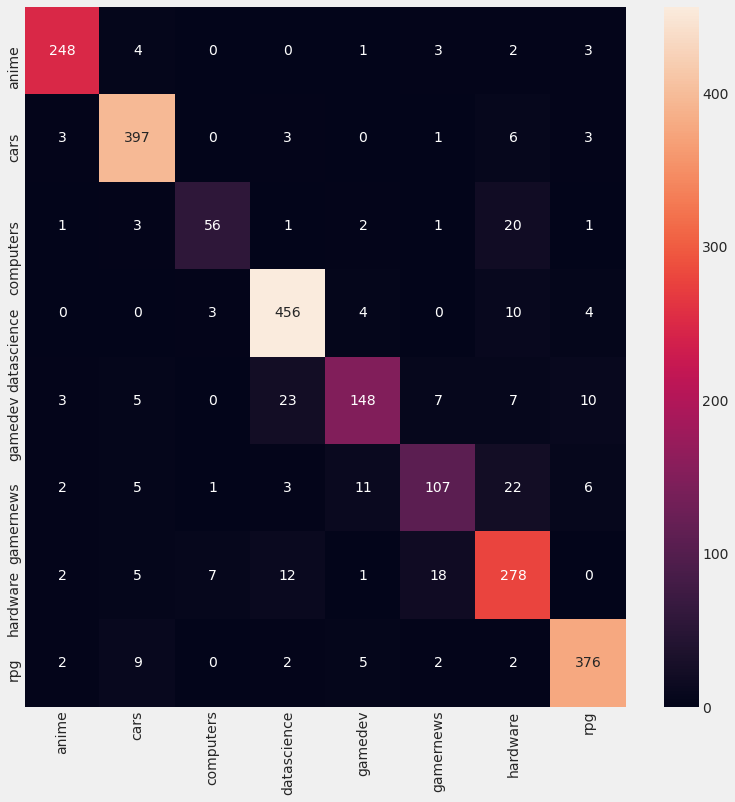

In [ ]:
from sklearn.linear_model import SGDClassifier
#SGD Classifier
param_grid = {'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}
grid = GridSearchCV(SGDClassifier(epsilon=0.1), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
sgd = grid.best_estimator_
ypred_val_sgd   = sgd.predict(X_testing)
y_pred_test_sgd = sgd.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Stochastic Gradient Descent Model: {}'.format(end-start))
confusion_matrix(ypred_val_sgd, y_testing)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished


Best cross-validation score: 0.89
Best parameters:  {'alpha': 0.2}
Best estimator:  BernoulliNB(alpha=0.2, binarize=0.12, class_prior=None, fit_prior=False)
Time to train and predict in Bernoulli Naive Bayes Model: 1.279128074645996
              precision    recall  f1-score   support

       anime       0.97      0.93      0.95       261
        cars       0.97      0.94      0.96       413
   computers       0.65      0.61      0.63        85
 datascience       0.93      0.95      0.94       477
     gamedev       0.80      0.73      0.76       203
   gamernews       0.64      0.78      0.70       157
    hardware       0.82      0.87      0.85       323
         rpg       0.95      0.91      0.93       398

    accuracy                           0.88      2317
   macro avg       0.84      0.84      0.84      2317
weighted avg       0.89      0.88      0.89      2317



0.8843331894691411

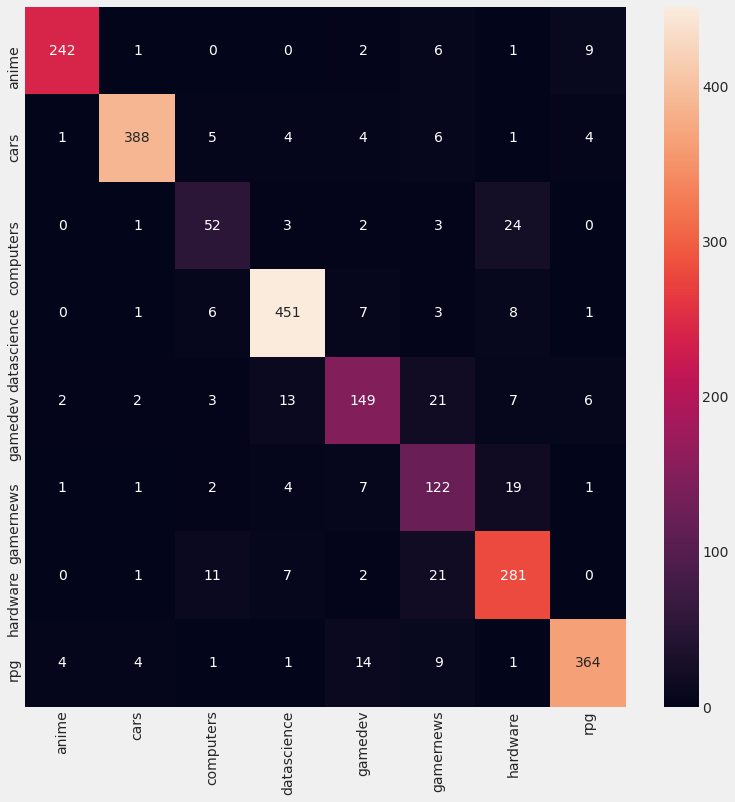

In [ ]:

from sklearn.naive_bayes import BernoulliNB
#Bernoulli Naive Bayes
param_grid = {'alpha': [0.01, 0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(BernoulliNB(fit_prior = False, binarize = 0.12), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
bnb = grid.best_estimator_
ypred_val_rc = bnb.predict(X_testing)
y_pred_test_rc=bnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Bernoulli Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_rc, y_testing)

Best cross-validation score: 0.90
Best parameters:  {'alpha': 0.05, 'fit_prior': True}
Best estimator:  MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)
Time to train and predict in Multinominal Naive Bayes Model: 1.0369937419891357
              precision    recall  f1-score   support

       anime       0.95      0.95      0.95       261
        cars       0.96      0.97      0.96       413
   computers       0.80      0.56      0.66        85
 datascience       0.91      0.97      0.94       477
     gamedev       0.89      0.72      0.80       203
   gamernews       0.80      0.60      0.68       157
    hardware       0.78      0.92      0.84       323
         rpg       0.92      0.95      0.94       398

    accuracy                           0.89      2317
   macro avg       0.88      0.83      0.85      2317
weighted avg       0.89      0.89      0.89      2317



0.8938282261545102

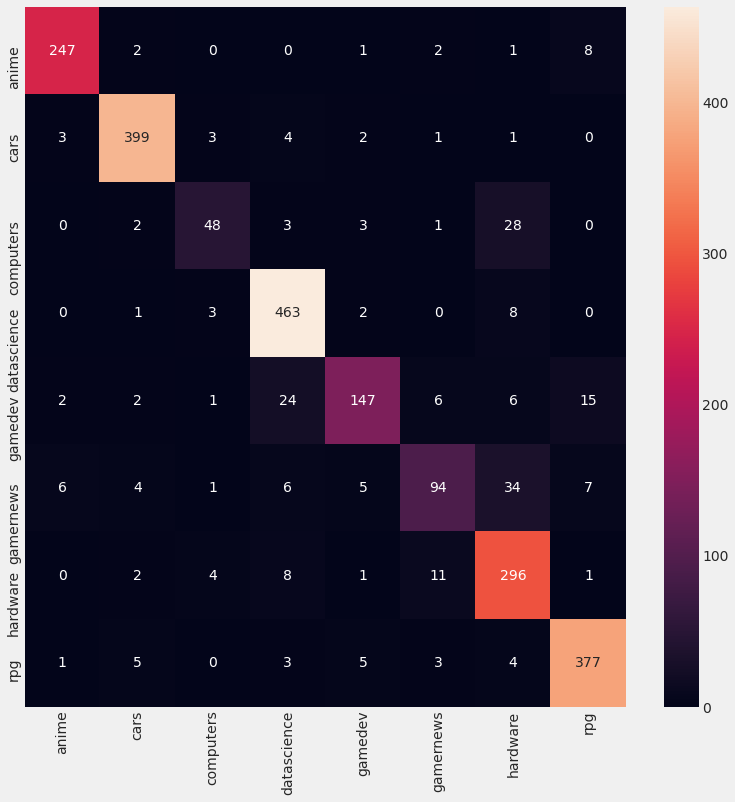

In [ ]:

#Multinominal Naive Bayes Classifier:
param_grid = {
            'fit_prior': [True],
            'alpha': [0.05, 0.07, 0.08, 0.1, 0.15]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
mnb = grid.best_estimator_
ypred_val_mnb   = mnb.predict(X_testing)
y_pred_test_mnb = mnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Multinominal Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_mnb, y_testing)

Best cross-validation score: 0.88
Best parameters:  {'alpha': 0.4, 'fit_prior': True}
Best estimator:  ComplementNB(alpha=0.4, class_prior=None, fit_prior=True, norm=False)
Time to train and predict in Multinominal Naive Bayes Model: 0.7086527347564697
              precision    recall  f1-score   support

       anime       0.93      0.97      0.95       261
        cars       0.94      0.98      0.96       413
   computers       0.82      0.36      0.50        85
 datascience       0.88      0.98      0.93       477
     gamedev       0.89      0.59      0.71       203
   gamernews       0.78      0.53      0.63       157
    hardware       0.76      0.90      0.82       323
         rpg       0.92      0.96      0.94       398

    accuracy                           0.88      2317
   macro avg       0.86      0.78      0.81      2317
weighted avg       0.88      0.88      0.87      2317



0.877859300820026

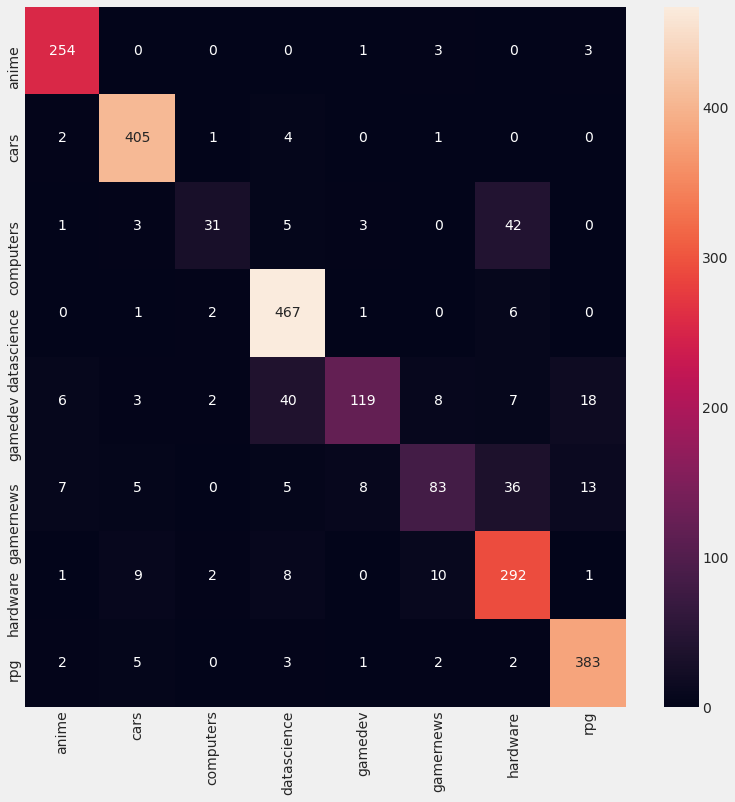

In [ ]:
from sklearn.naive_bayes import ComplementNB
#Complement Naive Bayes Classifier:
param_grid = {
            'fit_prior': [True],
            'alpha': [0.4, 0.5, 0.6]}
grid = GridSearchCV(ComplementNB(), param_grid, cv=5,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
cnb = grid.best_estimator_
ypred_val_cnb   = cnb.predict(X_testing)
y_pred_test_cnb = cnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Multinominal Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_cnb, y_testing)

Time to train and predict in OneVsRest Multinomial Naive Bayes Model: 0.40620923042297363
              precision    recall  f1-score   support

       anime       0.96      0.95      0.96       261
        cars       0.95      0.95      0.95       413
   computers       0.69      0.59      0.64        85
 datascience       0.93      0.96      0.94       477
     gamedev       0.86      0.74      0.79       203
   gamernews       0.70      0.73      0.71       157
    hardware       0.81      0.87      0.84       323
         rpg       0.94      0.93      0.94       398

    accuracy                           0.89      2317
   macro avg       0.85      0.84      0.85      2317
weighted avg       0.89      0.89      0.89      2317



0.8912386706948641

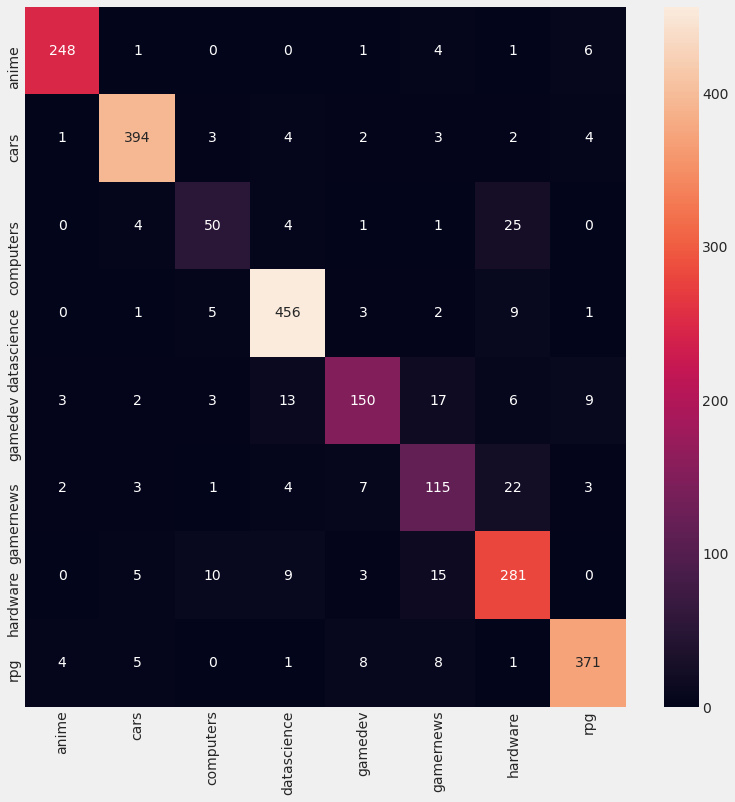

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
#OneVsRest Model:
ovr_mnb=OneVsRestClassifier(BernoulliNB(alpha=0.1, binarize=0.12, class_prior=None, fit_prior=False),n_jobs=-1)
start = time.time()
ovr_mnb.fit(X_training, y_training)    
ypred_val_ovrmnb = ovr_mnb.predict(X_testing)
y_pred_test_ovrmnb = ovr_mnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in OneVsRest Multinomial Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_ovrmnb, y_testing)

Time to train and predict in OneVsRest Multinomial Naive Bayes Model: 0.2602090835571289
              precision    recall  f1-score   support

       anime       0.95      0.95      0.95       261
        cars       0.95      0.97      0.96       413
   computers       0.89      0.48      0.63        85
 datascience       0.90      0.98      0.94       477
     gamedev       0.89      0.70      0.78       203
   gamernews       0.81      0.57      0.67       157
    hardware       0.79      0.92      0.85       323
         rpg       0.92      0.96      0.94       398

    accuracy                           0.89      2317
   macro avg       0.89      0.82      0.84      2317
weighted avg       0.89      0.89      0.89      2317



0.8929650410012948

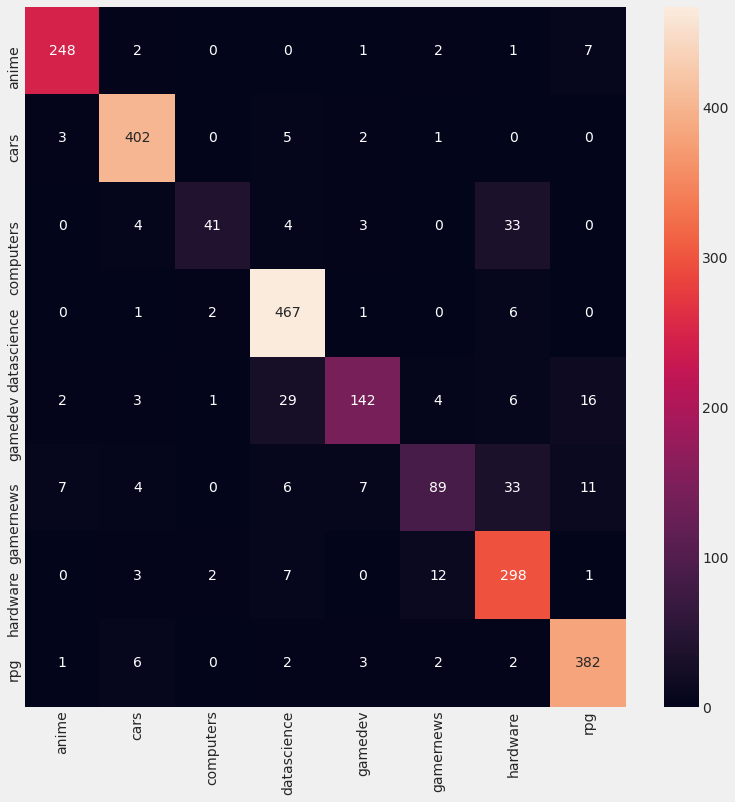

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
#OneVsRest Model:
ovr_mnb=OneVsRestClassifier(MultinomialNB(alpha=0.07),n_jobs=-1)
start = time.time()
ovr_mnb.fit(X_training, y_training)    
ypred_val_ovrmnb = ovr_mnb.predict(X_testing)
y_pred_test_ovrmnb = ovr_mnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in OneVsRest Multinomial Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_ovrmnb, y_testing)

Time to train and predict in OneVsRest Complement Naive Bayes Model: 108.48631620407104
              precision    recall  f1-score   support

       anime       0.95      0.95      0.95       261
        cars       0.94      0.98      0.96       413
   computers       0.86      0.29      0.44        85
 datascience       0.88      0.98      0.93       477
     gamedev       0.86      0.64      0.73       203
   gamernews       0.85      0.48      0.62       157
    hardware       0.74      0.91      0.82       323
         rpg       0.89      0.95      0.92       398

    accuracy                           0.87      2317
   macro avg       0.87      0.77      0.80      2317
weighted avg       0.88      0.87      0.86      2317



0.8731117824773413

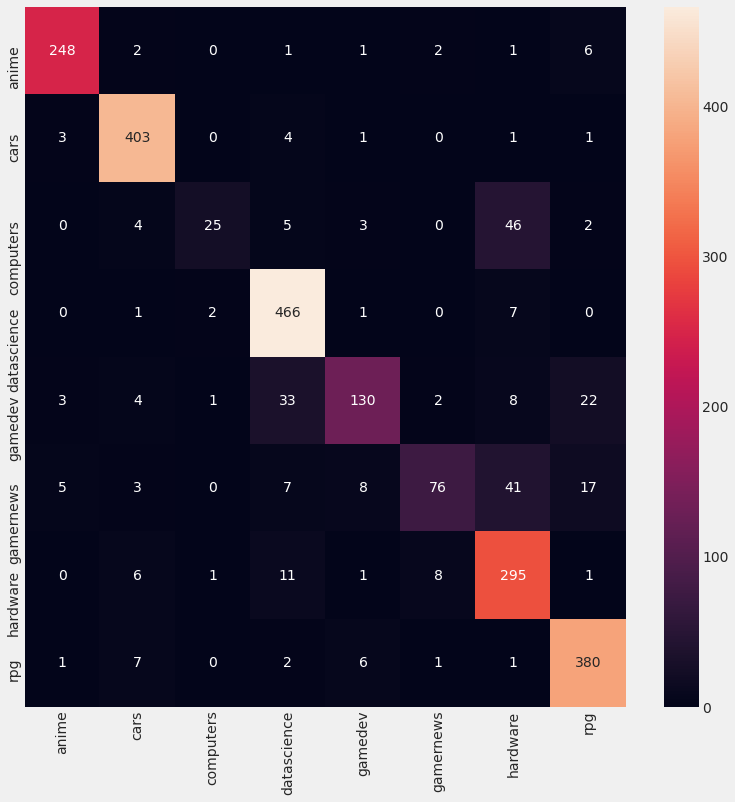

In [ ]:

from sklearn.multiclass import OneVsRestClassifier
#OneVsRest Model:
ovr_cnb=OneVsRestClassifier(ComplementNB(alpha=0.6),n_jobs=-1)
ovr_cnb.fit(X_training, y_training)    
ypred_val_overcnb = ovr_cnb.predict(X_testing)
y_pred_test_ovrcnb = ovr_cnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in OneVsRest Complement Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_overcnb, y_testing)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


Best cross-validation score: 0.90
Best parameters:  {'C': 10, 'multi_class': 'ovr'}
Best estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Time to train and predict in Logistic Regression Model: 88.46109127998352
              precision    recall  f1-score   support

       anime       0.97      0.95      0.96       261
        cars       0.93      0.96      0.95       413
   computers       0.87      0.69      0.77        85
 datascience       0.92      0.96      0.94       477
     gamedev       0.88      0.73      0.80       203
   gamernews       0.80      0.73      0.76       157
    hardware       0.81      0.88      0.84       323
         rpg       0.92      0.95      0.94       398

    accuracy 

0.8998705222270177

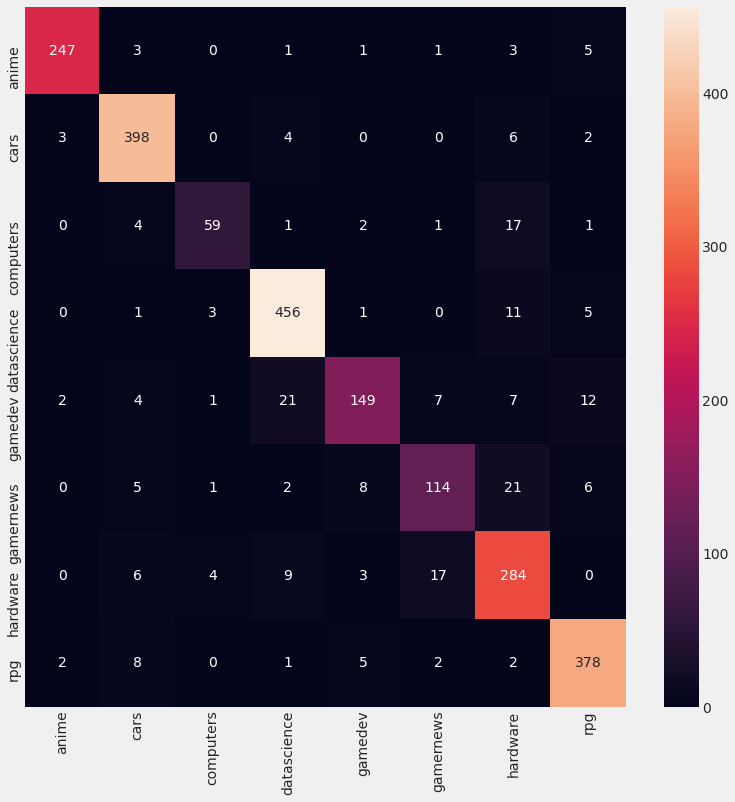

In [ ]:
#Logistic Regression
param_grid = {'C': [1, 10, 100, 1000 ],
                 'multi_class':['multinomial','ovr']}
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
lr = grid.best_estimator_
ypred_val_lr = lr.predict(X_testing)
y_pred_test_lr=lr.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Logistic Regression Model: {}'.format(end-start))
confusion_matrix(ypred_val_lr, y_testing)

Time to train and predict in Ensemble model: 0.15009117126464844
              precision    recall  f1-score   support

       anime       0.92      0.98      0.95       261
        cars       0.93      0.98      0.96       413
   computers       0.85      0.60      0.70        85
 datascience       0.87      0.98      0.92       477
     gamedev       0.88      0.63      0.74       203
   gamernews       0.81      0.62      0.70       157
    hardware       0.82      0.89      0.86       323
         rpg       0.95      0.95      0.95       398

    accuracy                           0.89      2317
   macro avg       0.88      0.83      0.85      2317
weighted avg       0.89      0.89      0.89      2317



0.8925334484246871

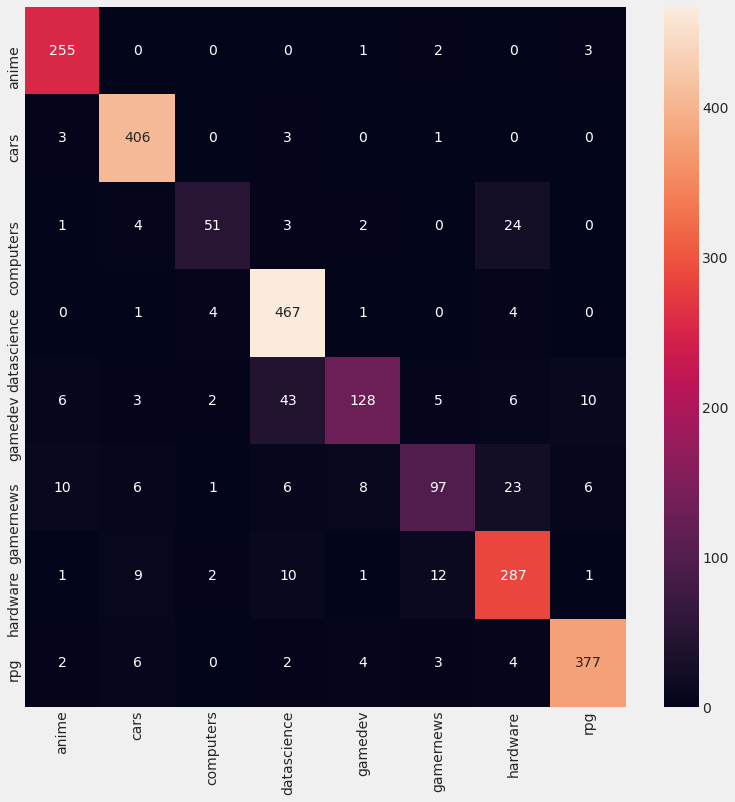

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('Complement NB', cnb), ('Multinomial Naive Bayes', mnb)]#,('Ridge',rc)]
ensemble = VotingClassifier(estimators, voting='hard')
start = time.time()
#Fitting the model on training data
ensemble.fit(X_training, y_training)
ypred_val_en   = ensemble.predict(X_testing)
y_pred_test_en = ensemble.predict(X_tfidf_sel2)
end =  time.time()
#test our model on the test data            
ensemble.score(X_testing, y_testing)
print('Time to train and predict in Ensemble model: {}'.format(end-start))
confusion_matrix(ypred_val_en, y_testing)

Time to train and predict in Ensemble model: 1.3875102996826172
              precision    recall  f1-score   support

       anime       0.95      0.96      0.95       261
        cars       0.94      0.98      0.96       413
   computers       0.88      0.49      0.63        85
 datascience       0.88      0.98      0.93       477
     gamedev       0.88      0.67      0.76       203
   gamernews       0.83      0.58      0.68       157
    hardware       0.80      0.90      0.84       323
         rpg       0.92      0.95      0.93       398

    accuracy                           0.89      2317
   macro avg       0.88      0.81      0.84      2317
weighted avg       0.89      0.89      0.88      2317



0.8882175226586103

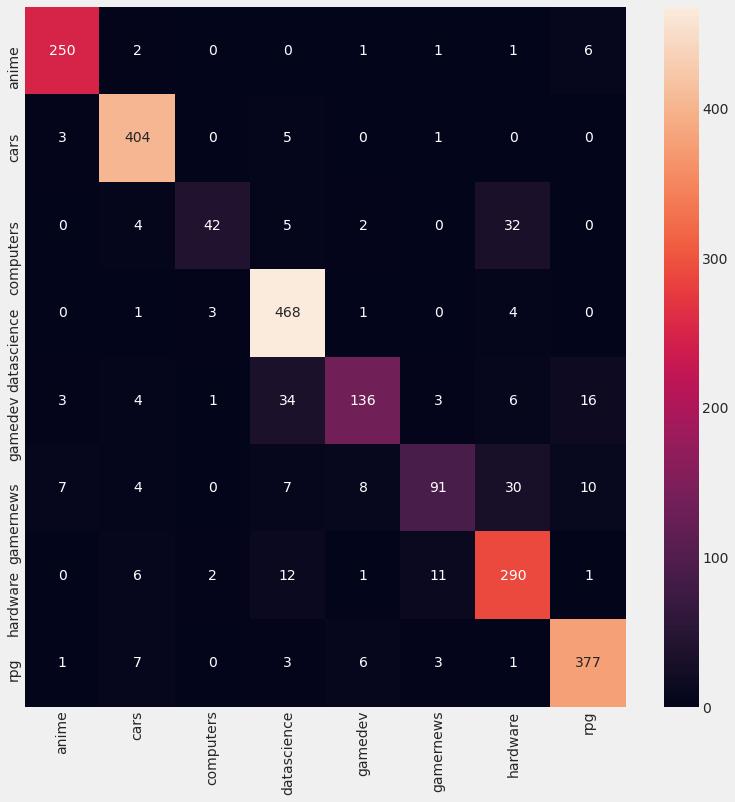

In [ ]:

from sklearn.ensemble import VotingClassifier
estimators=[('Complement NB', ovr_cnb), ('Multinomial Naive Bayes', ovr_mnb)]#,('Ridge',rc)]
ensemble_ovr = VotingClassifier(estimators, voting='hard')
start = time.time()
#Fitting the model on traininf data
ensemble_ovr.fit(X_training, y_training)
ypred_val_en   = ensemble_ovr.predict(X_testing)
y_pred_test_en = ensemble_ovr.predict(X_tfidf_sel2)
end =  time.time()
#test our model on the test data            
ensemble_ovr.score(X_testing, y_testing)
print('Time to train and predict in Ensemble model: {}'.format(end-start))
confusion_matrix(ypred_val_en, y_testing)

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('Complement NB', ovr_cnb), ('Multinomial Naive Bayes', ovr_mnb),('Bernoulli Naive Bayes', ovr_bnb)]#, ('Ridge',rc)]
ensemble_ovr = VotingClassifier(estimators, voting='hard')
start = time.time()
#Fitting the model on traininf data
ensemble_ovr.fit(X_training, y_training)
ypred_val_en   = ensemble_ovr.predict(X_testing)
y_pred_test_en = ensemble_ovr.predict(X_tfidf_sel2)
end =  time.time()
#test our model on the test data            
ensemble_ovr.score(X_testing, y_testing)
print('Time to train and predict in Ensemble model: {}'.format(end-start))
confusion_matrix(ypred_val_en, y_testing)

NameError: ignored

In [ ]:

#Ensemble fit over the full data
ensemble.fit(X_tfidf_sel2,y_datatrain)
y_pred_test_en = ensemble.predict(X_test_tfidf_sel2)

In [ ]:
rawdata= { 'Category': y_pred_test_en }
a = pd.DataFrame(rawdata, columns = ['Category'])
a.to_csv('y_pred.csv',index=True, header=True)

In [ ]:
import numpy as np
import scipy.sparse

class NaiveBayes: 
    
    def __init__(self):
        self.theta_k=0.
        self.theta_jk=0.
        
    def fit(self,X,y):
        index=[]
        self.theta_jk=np.zeros((20,X.shape[1]))
        self.theta_k=np.zeros(20)
        
        self.classes = np.unique(y)
        
        #calculating theta  for each 
        for k, class_val in enumerate(self.classes):
            #finding indexes where inputs are in class k
            index=np.where(y==class_val)
            #finding pobability of each class
            self.theta_k[k] = (len(index[0]))/float(y.shape[0])
            #computing conditional probability of each feature for each class 
            #Laplace smoothing is used to deal with words which are not observed 
            #in the training data but are available in the training set
            self.theta_jk[k][:] = (scipy.sparse.csr_matrix.sum(X[index],axis=0)+1)/(float(len(index[0]))+2)
                  
        return
    
    def predict(self,X):
        
        prob_y=np.zeros((20,len(X)))
        for k, class_val in enumerate(self.classes):
            
            w0 = np.log(self.theta_k[k])+((np.log(1-self.theta_jk[k][:])).sum())
            w = np.log(self.theta_jk[k][:])-np.log(1-self.theta_jk[k][:])
            #The probabilitis of being in each of k classes for each of input data(comments)
            prob_y[k]=np.matmul(X,w.T) + w0  
        #selecting the class with higher probability for each input data (comment)
        print(np.argmax(prob_y.T, axis=1)) 
        y_predict=np.unique(np.argmax(prob_y.T, axis=1))

        return y_predict
    def score(self,y,y_pred):
        #number of predictions       
        num_pred = np.float(len(y))
        #calculating average accuracy over all classes
        average_acc = np.sum((y==y_pred)*1)/num_pred
        #calculating accuracy for each class 
        acc=np.zeros(20)
        
        #classes = np.unique(y)
        
        for k, class_val in enumerate(self.classes): 
            index=np.where(y==class_val)
            num_pred=np.float(len(index[0]))
            #acc array contains accuracies for each of 20 classes in the order of
            #the below dictionary:
            #dictionary={'anime':0, 'Music':1, 'trees':2, 'conspiracy':3, 'canada':4, 'hockey':5, 
            #'worldnews':6, 'funny':7, 'GlobalOffensive':8, 'AskReddit':9, 'nba':10, 
            #'nfl':11, 'europe':12, 'soccer':13, 'wow':14 , 'Overwatch':15,
            #'gameofthrones':16, 'movies':17, 'leagueoflegends':18,'baseball':19} 
            acc[k]= (np.sum(y_pred[index]==class_val).astype(np.int))/num_pred
        return acc,average_acc
    
    def get_classes(self):
        return self.classes
    
def test(X_training, y_training, X_testing, y_testing):
    
    
    d = NaiveBayes()
    
    #X_training = X_train  
    y_training = np.array(y_training)
    X_testing = X_testing.toarray()
    y_testing = np.array(y_testing)
    d.fit(X_training, y_training)
    y_prediction = d.predict(X_testing)
    (acc, average_acc) = d.score(y_testing, y_prediction)
    print("Average accuracy on test set: ", average_acc)
    print("\nAccuracy on test set for each class: ")
    for a,b in zip(d.get_classes(),acc):
        print(a, ": ", b)
test(X_training, y_training, X_testing, y_testing)

[8 8 8 ... 8 8 8]


IndexError: ignored

In [ ]:
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument

In [ ]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cleandata_Train, y_datatrain, random_state=1, test_size=0.2)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 11582/11582 [00:00<00:00, 1697240.90it/s]


In [ ]:
for epoch in range(10):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 11582/11582 [00:00<00:00, 2453827.80it/s]


In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:

train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
logreg = LogisticRegression(n_jobs=-1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [ ]:
from sklearn.metrics import classification_report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8476478204574881
              precision    recall  f1-score   support

       anime       0.91      0.90      0.91       266
        cars       0.94      0.94      0.94       423
   computers       0.56      0.73      0.64        74
 datascience       0.88      0.92      0.90       469
     gamedev       0.77      0.65      0.71       204
   gamernews       0.62      0.62      0.62       143
    hardware       0.79      0.80      0.80       315
         rpg       0.90      0.87      0.88       423

    accuracy                           0.85      2317
   macro avg       0.80      0.80      0.80      2317
weighted avg       0.85      0.85      0.85      2317

